In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 


In [2]:
adult = fetch_ucirepo(id=2) 

In [6]:
print(adult.variables) 

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [4]:
df = pd.concat([adult.data.features, adult.data.targets], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
variables = ['age','education-num','capital-gain','capital-loss','hours-per-week']
medida = pd.DataFrame(index=variables)
medida['Media'] = df[variables].mean()
medida['Mediana'] = df[variables].median()
medida['Moda'] = df[variables].mode().iloc[0]

# Mostrar la tabla
print(medida)

                      Media  Mediana  Moda
age               38.643585     37.0    36
education-num     10.078089     10.0     9
capital-gain    1079.067626      0.0     0
capital-loss      87.502314      0.0     0
hours-per-week    40.422382     40.0    40


In [11]:
# Creamos un resumen con medidas de variabilidad
variabilidad = pd.DataFrame({
    'Varianza': df[variables].var(),
    'Desviación estándar': np.sqrt(df[variables].var()),
    'Cte de Variacion': (np.sqrt(df[variables].var())/df[variables].mean())*100,
    'Rango': df[variables].max() - df[variables].min()
})

# Redondeamos los valores
variabilidad = variabilidad.round(2)

# Mostramos el resultado
print(variabilidad)

                   Varianza  Desviación estándar  Cte de Variacion  Rango
age                  187.98                13.71             35.48     73
education-num          6.61                 2.57             25.51     15
capital-gain    55532588.04              7452.02            690.60  99999
capital-loss      162412.67               403.00            460.56   4356
hours-per-week       153.55                12.39             30.65     98


In [12]:
# Calcular asimetría y curtosis
medidas_forma = pd.DataFrame({
    'Asimetría (Skewness)': df[variables].skew(),
    'Curtosis': df[variables].kurt()
})

print(medidas_forma)

                Asimetría (Skewness)    Curtosis
age                         0.557580   -0.184269
education-num              -0.316525    0.625745
capital-gain               11.894659  152.693096
capital-loss                4.569809   20.014346
hours-per-week              0.238750    2.951059


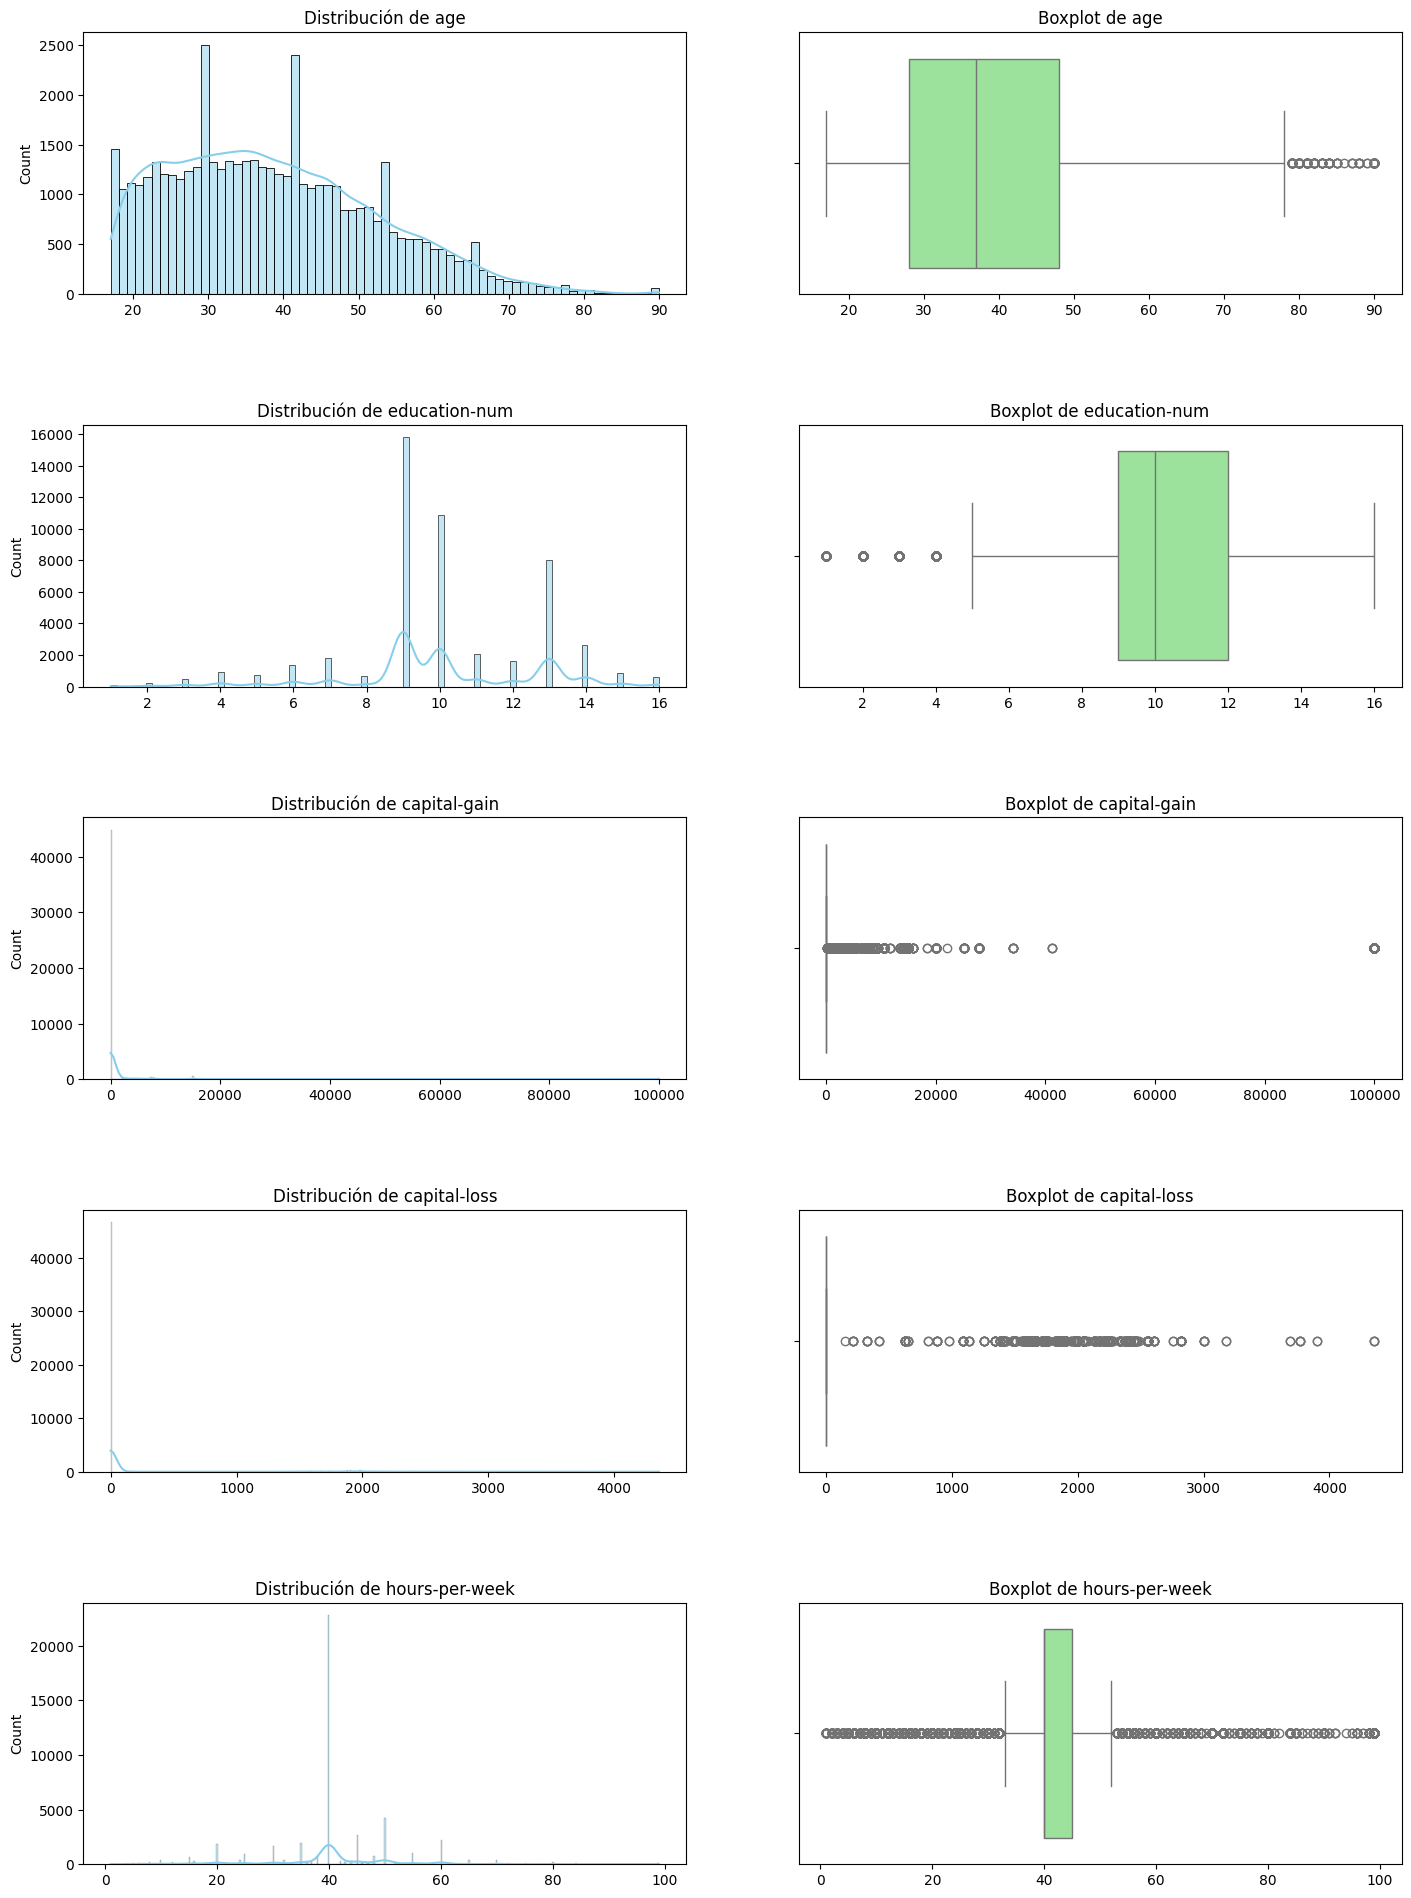

In [17]:
# Lista de variables numéricas para graficar

# Crear figura de subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(15, len(variables)*4))
fig.tight_layout(pad=5.0)

# Generar gráficos
for i, var in enumerate(variables):
    # Histograma + KDE
    sns.histplot(df[var], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Distribución de {var}')
    axes[i, 0].set_xlabel('')

    # Boxplot
    sns.boxplot(x=df[var], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot de {var}')
    axes[i, 1].set_xlabel('')

plt.subplots_adjust(hspace=0.5)
plt.show()

Medidas y gráficas descriptivas multivariadas

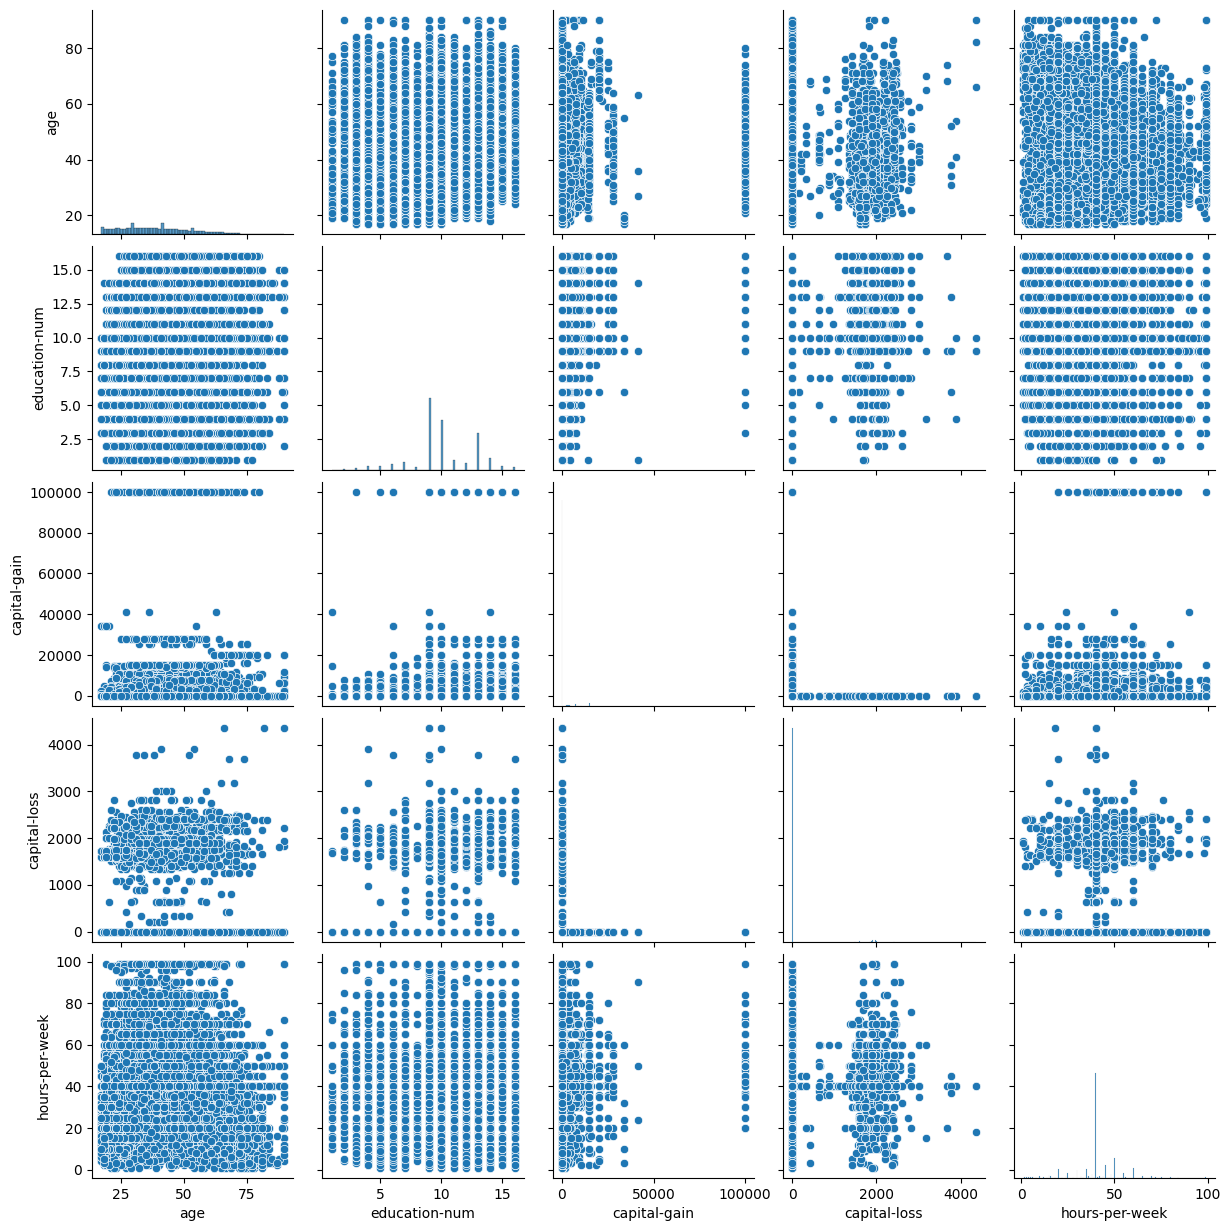

In [18]:
#Se toman todas las variables para revisar la correlación
continuas=df[variables]
sns.pairplot(continuas)

In [19]:
#Matriz de correlación
correlacion_matrix = continuas.corr()
continuas.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.030940,0.077229,0.056944,0.071558
education-num,0.030940,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,0.143689,0.082157,0.054467,1.000000


<Axes: >

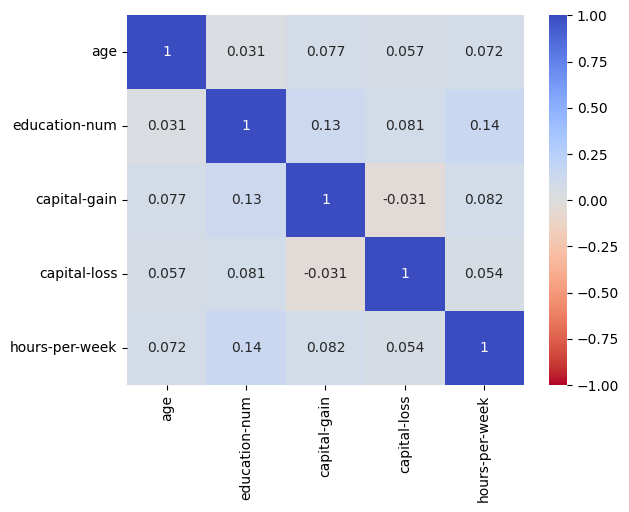

In [20]:
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm_r",center=0, vmin=-1, vmax=1)